In [1]:
#Import all necessary modules
import pandas as pd  
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
from sklearn.preprocessing import scale

In [2]:
df = pd.read_csv("Holiday_Package.csv")

In [3]:
from warnings import filterwarnings         # This is mainly used to avoid the unnecessary warnings which come while running the code due to the changes in the python liabrary 
filterwarnings("ignore")

## EDA

In [4]:
df.head()

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,no,48412,30,8,1,1,no
1,2,yes,37207,45,8,0,1,no
2,3,no,58022,46,9,0,0,no
3,4,no,66503,31,11,2,0,no
4,5,no,66734,44,12,0,2,no


In [8]:
df.tail()

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
867,868,no,40030,24,4,2,1,yes
868,869,yes,32137,48,8,0,0,yes
869,870,no,25178,24,6,2,0,yes
870,871,yes,55958,41,10,0,1,yes
871,872,no,74659,51,10,0,0,yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         872 non-null    int64 
 1   Holliday_Package   872 non-null    object
 2   Salary             872 non-null    int64 
 3   age                872 non-null    int64 
 4   educ               872 non-null    int64 
 5   no_young_children  872 non-null    int64 
 6   no_older_children  872 non-null    int64 
 7   foreign            872 non-null    object
dtypes: int64(6), object(2)
memory usage: 54.6+ KB


In [7]:
df.shape

(872, 8)

There are no missing values.  
Most of the variables are integer type except Holiday Package and foreign.
Holiday package is our target variable

In [6]:
df.describe()

,Unnamed: 0,Salary,age,educ,no_young_children,no_older_children
count,872.000000,872.000000,872.000000,872.000000,872.000000,872.000000
mean,436.500000,47729.172018,39.955275,9.307339,0.311927,0.982798
std,251.869014,23418.668531,10.551675,3.036259,0.612870,1.086786
min,1.000000,1322.000000,20.000000,1.000000,0.000000,0.000000
25%,218.750000,35324.000000,32.000000,8.000000,0.000000,0.000000
50%,436.500000,41903.500000,39.000000,9.000000,0.000000,1.000000
75%,654.250000,53469.500000,48.000000,12.000000,0.000000,2.000000
max,872.000000,236961.000000,62.000000,21.000000,3.000000,6.000000


### Check for Missing values

In [7]:
df.isnull().sum()

Unnamed: 0           0
Holliday_Package     0
Salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreign              0
dtype: int64

In [8]:
df.isnull().sum()

Unnamed: 0           0
Holliday_Package     0
Salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreign              0
dtype: int64

### Checking for Duplicates

In [9]:
# Are there any duplicates ?
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
#df[dups]

Number of duplicate rows = 0


### Unique values in the categorical data:

In [10]:
for column in df[['Holliday_Package', 'foreign']]:
    print(column.upper(),': ',df[column].nunique())
    print(df[column].value_counts().sort_values())
    print('\n')

HOLLIDAY_PACKAGE :  2
yes    401
no     471
Name: Holliday_Package, dtype: int64


FOREIGN :  2
yes    216
no     656
Name: foreign, dtype: int64




### Percentage of target :

In [11]:
df.Holliday_Package.value_counts

<bound method IndexOpsMixin.value_counts of 0       no
1      yes
2       no
3       no
4       no
      ... 
867     no
868    yes
869     no
870    yes
871     no
Name: Holliday_Package, Length: 872, dtype: object>

In [12]:
df.Holliday_Package.value_counts(1)

no     0.540138
yes    0.459862
Name: Holliday_Package, dtype: float64

This split indicates that 45% of employees are interested in the holiday package.

### Univariate Analysis:

### Salary Variable:

In [41]:
print('Range of values: ', df['Salary'].max()-df['Salary'].min())

Range of values:  72582.0


In [42]:
# Central values:

print('Minimum Age: ', df['Salary'].min())
print('Maximum Age: ',df['Salary'].max())
print('Mean value: ', df['Salary'].mean())
print('Median value: ',df['Salary'].median())
print('Standard deviation: ', df['Salary'].std())
print('Null values: ',df['Salary'].isnull().any())

Minimum Age:  8105.75
Maximum Age:  80687.75
Mean value:  45608.33686926605
Median value:  41903.5
Standard deviation:  15699.745150717654
Null values:  False


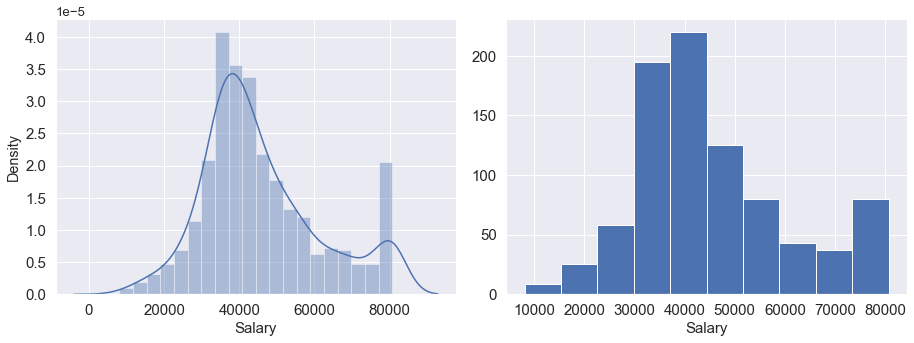

In [43]:
fig, (ax2,ax3)=plt.subplots(1,2,figsize=(13,5))

#distplot
sns.distplot(df['Salary'],ax=ax2)
ax2.set_xlabel('Salary', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['Salary'])
ax3.set_xlabel('Salary', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

### Age Variable:

In [44]:
print('Range of values: ', df['age'].max()-df['age'].min())

Range of values:  42.0


In [45]:
# Central values: 

print('Minimum Duration: ', df['age'].min())
print('Maximum Duration: ',df['age'].max())
print('Mean value: ', df['age'].mean())
print('Median value: ',df['age'].median())
print('Standard deviation: ', df['age'].std())
print('Null values: ',df['age'].isnull().any())

Minimum Duration:  20.0
Maximum Duration:  62.0
Mean value:  39.955275229357795
Median value:  39.0
Standard deviation:  10.551674590487607
Null values:  False


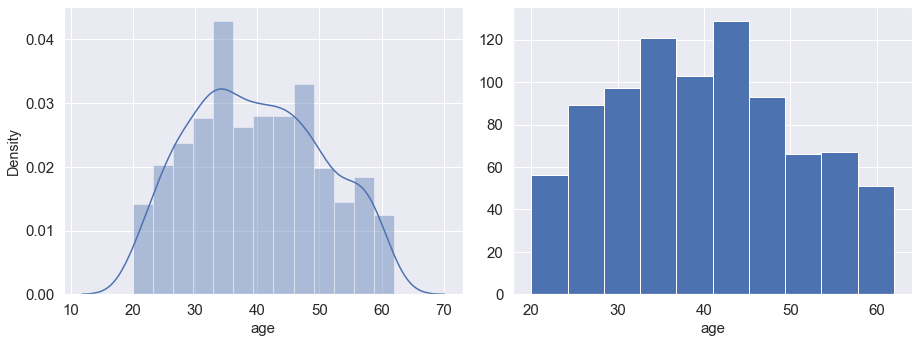

In [46]:
fig, (ax2,ax3)=plt.subplots(1,2,figsize=(13,5))

#distplot
sns.distplot(df['age'],ax=ax2)
ax2.set_xlabel('age', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['age'])
ax3.set_xlabel('age', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

### Education Variable:

In [47]:
print('Range of values: ', df['educ'].max()-df['educ'].min())

Range of values:  16.0


In [48]:
# Central values:

print('Minimum Sales: ', df['educ'].min())
print('Maximum Sales: ',df['educ'].max())
print('Mean value: ', df['educ'].mean())
print('Median value: ',df['educ'].median())
print('Standard deviation: ', df['educ'].std())
print('Null values: ',df['educ'].isnull().any())

Minimum Sales:  2.0
Maximum Sales:  18.0
Mean value:  9.302752293577981
Median value:  9.0
Standard deviation:  3.0147119925149255
Null values:  False


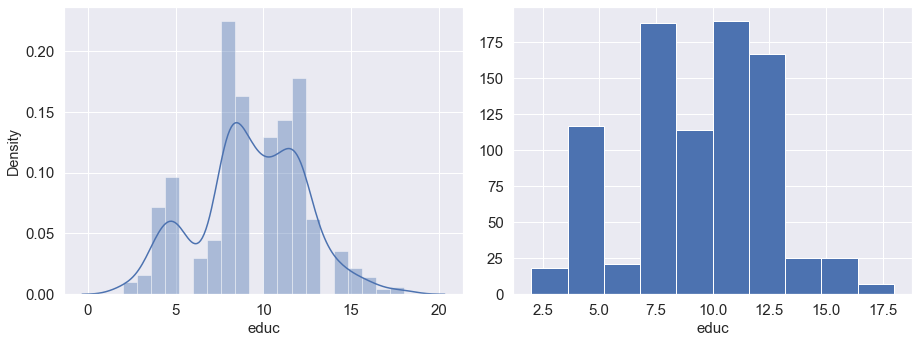

In [49]:
fig, (ax2,ax3)=plt.subplots(1,2,figsize=(13,5))

#distplot
sns.distplot(df['educ'],ax=ax2)
ax2.set_xlabel('educ', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['educ'])
ax3.set_xlabel('educ', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

### No Young Children Variable:

In [50]:
print('Range of values: ', df['no_young_children'].max()-df['no_young_children'].min())

Range of values:  0.0


In [51]:
# Central values:

print('Minimum Sales: ', df['no_young_children'].min())
print('Maximum Sales: ',df['no_young_children'].max())
print('Mean value: ', df['no_young_children'].mean())
print('Median value: ',df['no_young_children'].median())
print('Standard deviation: ', df['no_young_children'].std())
print('Null values: ',df['no_young_children'].isnull().any())

Minimum Sales:  0.0
Maximum Sales:  0.0
Mean value:  0.0
Median value:  0.0
Standard deviation:  0.0
Null values:  False


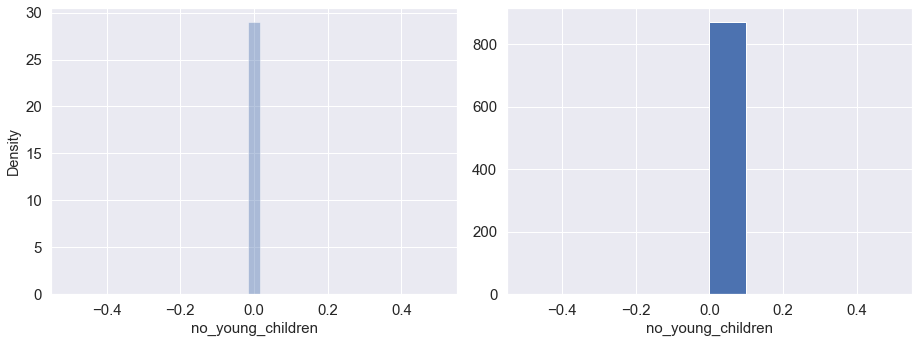

In [52]:
fig, (ax2,ax3)=plt.subplots(1,2,figsize=(13,5))

#distplot
sns.distplot(df['no_young_children'],ax=ax2)
ax2.set_xlabel('no_young_children', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['no_young_children'])
ax3.set_xlabel('no_young_children', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

### No Older Children Variable:

In [53]:
print('Range of values: ', df['no_older_children'].max()-df['no_older_children'].min())

Range of values:  5.0


In [54]:
# Central values:

print('Minimum Sales: ', df['no_older_children'].min())
print('Maximum Sales: ',df['no_older_children'].max())
print('Mean value: ', df['no_older_children'].mean())
print('Median value: ',df['no_older_children'].median())
print('Standard deviation: ', df['no_older_children'].std())
print('Null values: ',df['no_older_children'].isnull().any())

Minimum Sales:  0.0
Maximum Sales:  5.0
Mean value:  0.9805045871559633
Median value:  1.0
Standard deviation:  1.0771974192861413
Null values:  False


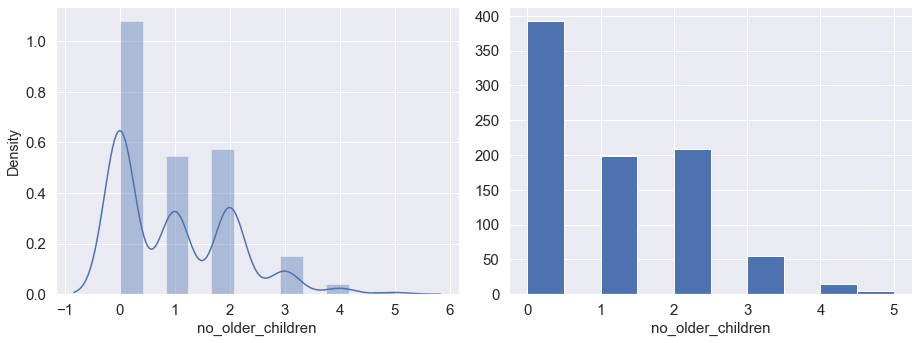

In [55]:
fig, (ax2,ax3)=plt.subplots(1,2,figsize=(13,5))

#distplot
sns.distplot(df['no_older_children'],ax=ax2)
ax2.set_xlabel('no_older_children', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['no_older_children'])
ax3.set_xlabel('no_older_children', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

### CATEGORICAL UNIVARIATE ANALYSIS:

### FOREIGN:

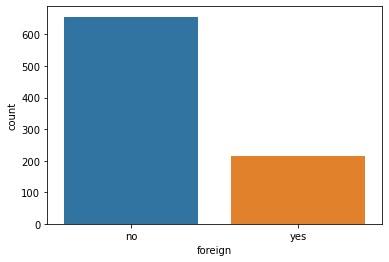

In [14]:
sns.countplot(data = df, x = 'foreign')                                                  ## count plot
plt.show()

### HOLIDAY PACKAGE:

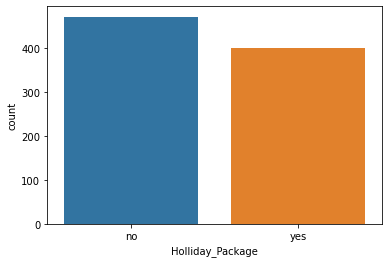

In [16]:
sns.countplot(data = df, x = 'Holliday_Package')                                                  ## count plot
plt.show()

### HOLIDAY PACKAGE VS SALARY:

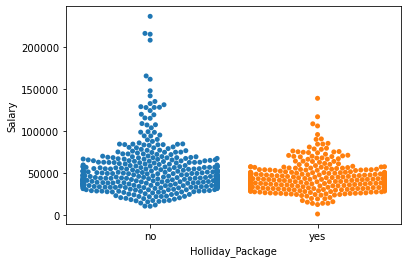

In [17]:
sns.swarmplot(data = df, x='Holliday_Package', y='Salary')                                    ## Swarmpot
plt.show()

### HOLIDAY PACKAGE VS AGE:

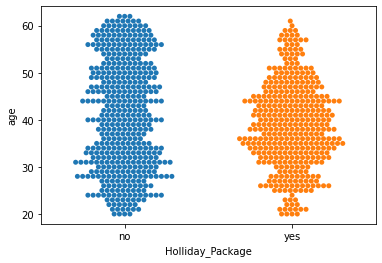

In [19]:
sns.swarmplot(data = df, x='Holliday_Package', y='age')                                    ## Swarmpot
plt.show()

### HOLIDAY PACKAGE VS EDUCATION:

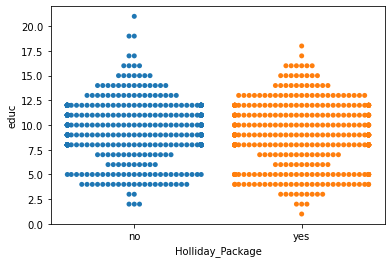

In [21]:
sns.swarmplot(data = df, x='Holliday_Package', y='educ')                                    ## Swarmpot
plt.show()

### HOLIDAY PACKAGE VS NO YOUNG CHILDREN: 

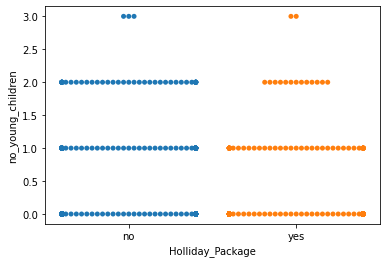

In [22]:
sns.swarmplot(data = df, x='Holliday_Package', y='no_young_children')                                    ## Swarmpot
plt.show()

### HOLIDAY PACKAGE VS OLDER CHILDREN:

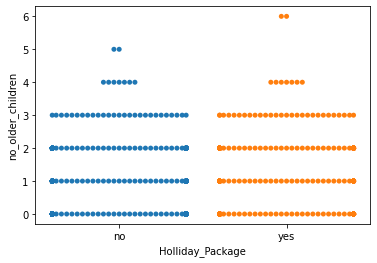

In [23]:
sns.swarmplot(data = df, x='Holliday_Package', y='no_older_children')                                    ## Swarmpot
plt.show()

### AGE VS SALARY VS HOLIDAY PACKAGE:

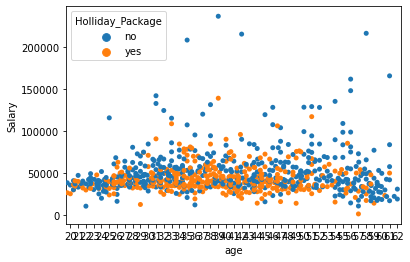

In [25]:
sns.swarmplot(data = df, x='age', y='Salary' , hue='Holliday_Package')                                    ## Swarmpot
plt.show()

### EDUC VS SALARY VS HOLIDAY PACKAGE:

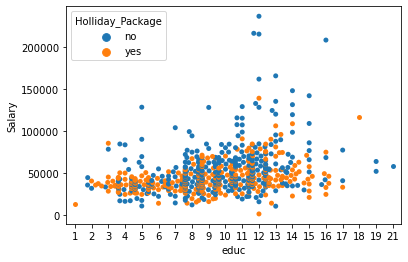

In [26]:
sns.swarmplot(data = df, x='educ', y='Salary' , hue='Holliday_Package')                                    ## Swarmpot
plt.show()

### NO YOUNG CHILDREN VS AGE VS HOLIDAY PACKAGE:

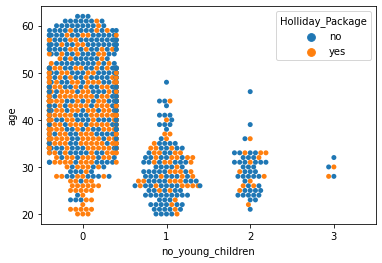

In [27]:
sns.swarmplot(data = df, x='no_young_children', y='age' , hue='Holliday_Package')                                    ## Swarmpot
plt.show()

### NO OLDER CHILDREN VS AGE VS HOLIDAY_PACKAGE:

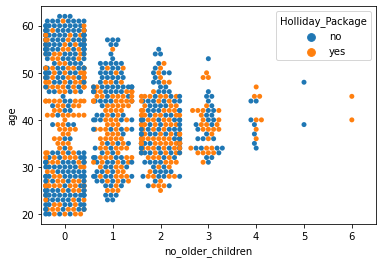

In [28]:
sns.swarmplot(data = df, x='no_older_children', y='age' , hue='Holliday_Package')                                    ## Swarmpot
plt.show()

### BIVARITE ANALYSIS:

### DATA DISTRIBUTION:

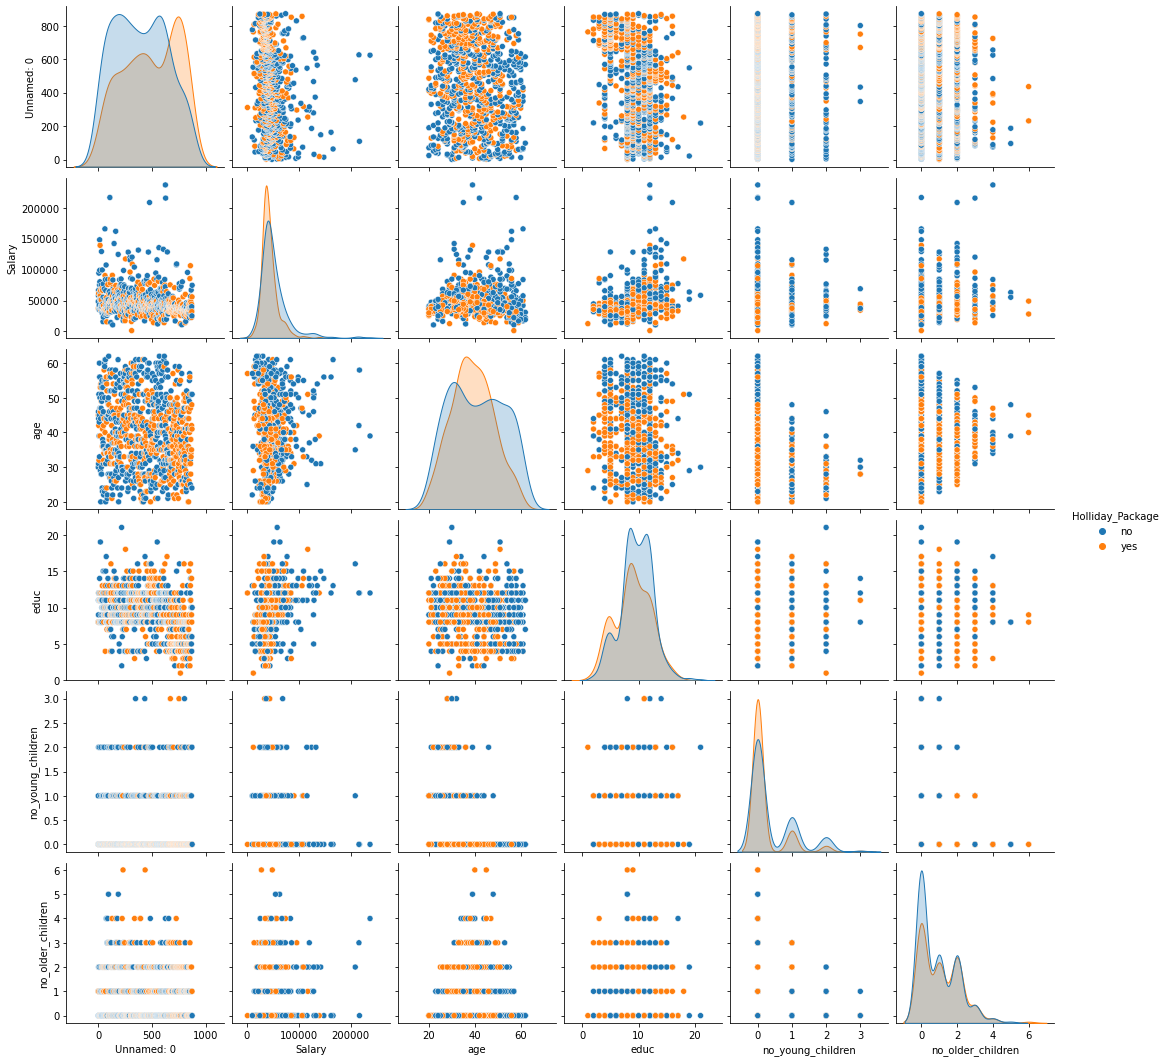

In [32]:
sns.pairplot(df, hue='Holliday_Package')
plt.show()

### Bi-Variate Analysis with Target variable:

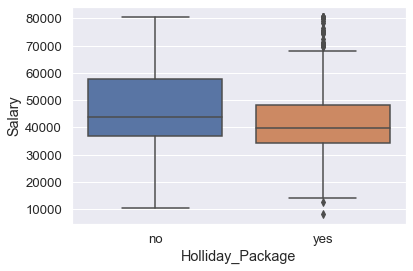

In [56]:
sns.boxplot(df['Holliday_Package'], df['Salary']);

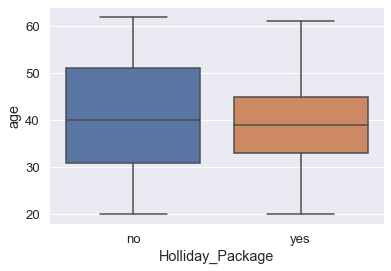

In [57]:
sns.boxplot(df['Holliday_Package'], df['age']);

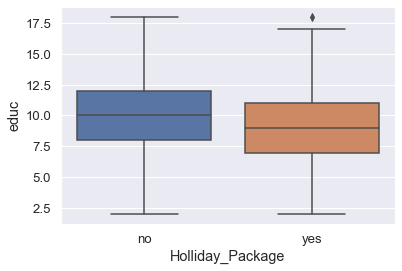

In [58]:
sns.boxplot(df['Holliday_Package'], df['educ']);

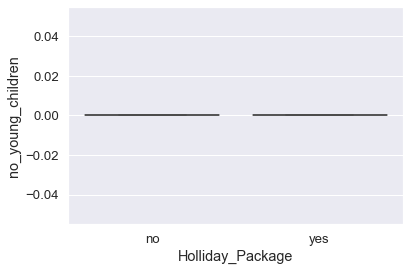

In [59]:
sns.boxplot(df['Holliday_Package'], df['no_young_children']);

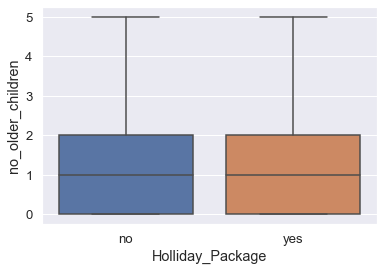

In [60]:
sns.boxplot(df['Holliday_Package'], df['no_older_children']);

### Checking for Correlations:

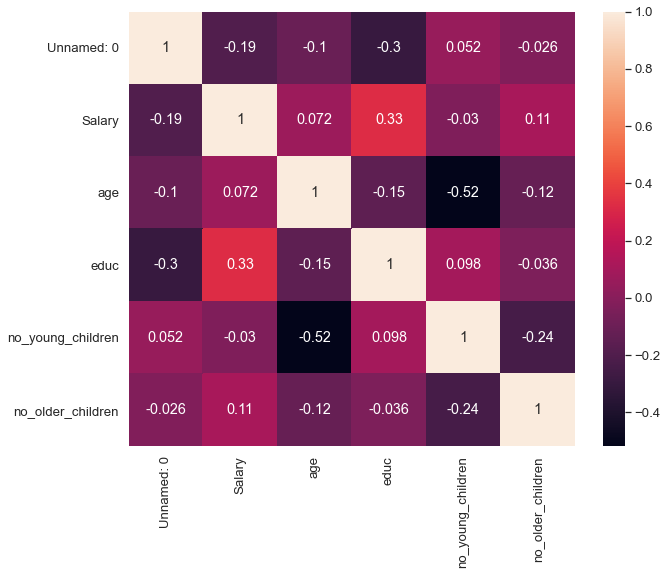

In [33]:
# construct heatmap with only continuous variables
plt.figure(figsize=(10,8))
sns.set(font_scale=1.2)
sns.heatmap(df.corr(), annot=True)
plt.show()

### Checking for Outliers:

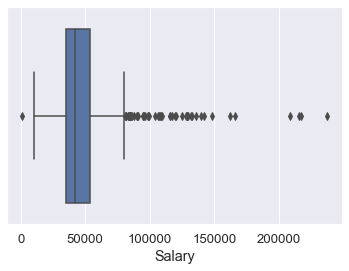

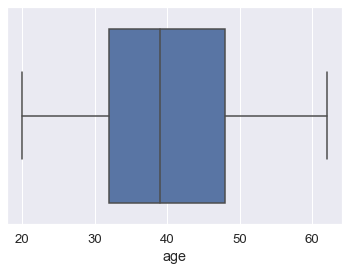

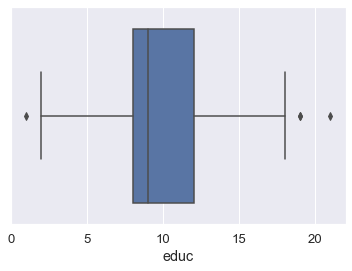

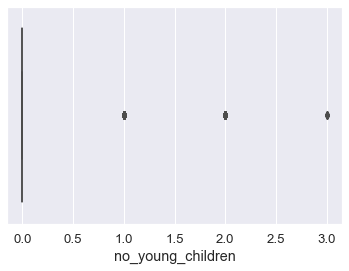

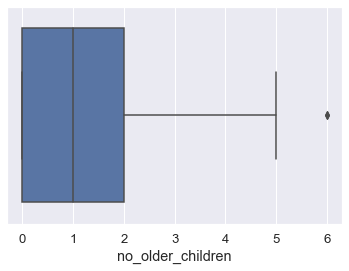

In [35]:
cols=['Salary','age','educ','no_young_children','no_older_children'];

for i in cols:
    sns.boxplot(df[i])
    plt.show()

### AFTER OUTLIER TREATMENT:

In [36]:
### Outlier treatment :

def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [39]:
for column in df[cols].columns:
    lr,ur=remove_outlier(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])

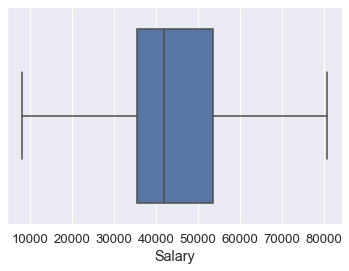

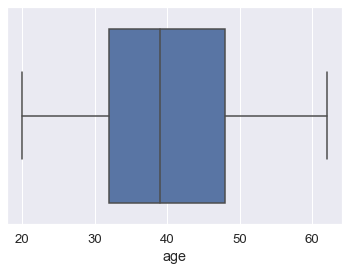

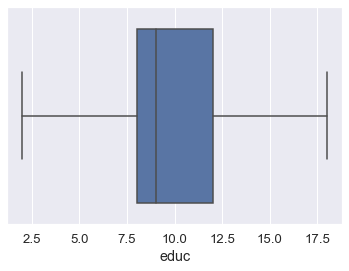

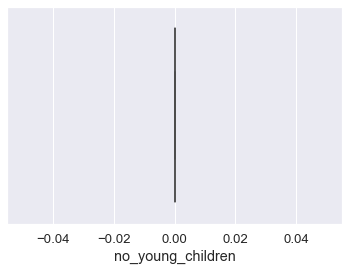

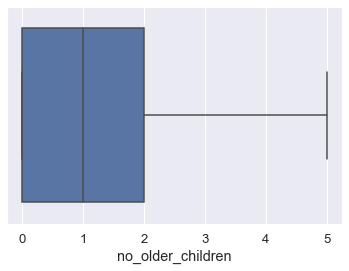

In [40]:
cols = ['Salary','age','educ','no_young_children','no_older_children']
for i in cols:
    sns.boxplot(df[i],whis=1.5)
    plt.show();

### ENCODING CATEGORICAL VARIABLE:

In [64]:
df=pd.get_dummies(df, columns=['Holliday_Package', 'foreign'], drop_first =True)

In [66]:
df.drop('Unnamed: 0', axis='columns', inplace=True)

In [67]:
df.head()

,Salary,age,educ,no_young_children,no_older_children,Holliday_Package_yes,foreign_yes
0,48412.0,30.0,8.0,0.0,1.0,0,0
1,37207.0,45.0,8.0,0.0,1.0,1,0
2,58022.0,46.0,9.0,0.0,0.0,0,0
3,66503.0,31.0,11.0,0.0,0.0,0,0
4,66734.0,44.0,12.0,0.0,2.0,0,0


### Train / Test split:

In [69]:
# Copy all the predictor variables into X dataframe:

X = df.drop('Holliday_Package_yes', axis=1)

# Copy Target into the Y dataframe:

Y = df['Holliday_Package_yes']

In [70]:
# Split X and Y into Training and Test Set into 70:30 Ratio:

X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=0.30, random_state=1, stratify = Y)

In [71]:
print('Number of rows and columns of the training set for the independent variables:',X_train.shape)
print('Number of rows and columns of the training set for the dependent variable:',Y_train.shape)
print('Number of rows and columns of the test set for the independent variables:',X_test.shape)
print('Number of rows and columns of the test set for the dependent variable:',Y_test.shape)

Number of rows and columns of the training set for the independent variables: (610, 6)
Number of rows and columns of the training set for the dependent variable: (610,)
Number of rows and columns of the test set for the independent variables: (262, 6)
Number of rows and columns of the test set for the dependent variable: (262,)


In [78]:
Y_train.value_counts(1)

0    0.539344
1    0.460656
Name: Holliday_Package_yes, dtype: float64

In [80]:
Y_test.value_counts(1)

0    0.541985
1    0.458015
Name: Holliday_Package_yes, dtype: float64

### Logistic Regression Model:

In [82]:
# Fit the Logistic Regression model
model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
model.fit(X_train, Y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.8s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

### Predicting on Training and Test dataset:

In [83]:
Ytrain_predict = model.predict(X_train)
Ytest_predict = model.predict(X_test)

### Getting the Predicted Classes and Probs:

In [84]:
Ytest_predict_prob=model.predict_proba(X_test)
pd.DataFrame(Ytest_predict_prob).head()

,0,1
0,0.640766,0.359234
1,0.569940,0.430060
2,0.655265,0.344735
3,0.564177,0.435823
4,0.538867,0.461133


### Model Evaluation:

In [85]:
# Accuracy - Training Data
model.score(X_train, Y_train)

0.6344262295081967

### AUC and ROC for the Training data:

AUC: 0.661


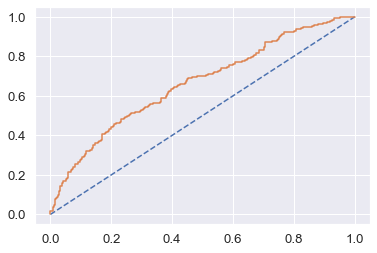

In [86]:
# Predict Probabilities:

probs = model.predict_proba(X_train)

# keep probabilities for the positive outcome only:
probs = probs[:, 1]

# Calculate AUC
auc = roc_auc_score(Y_train, probs)
print('AUC: %.3f' % auc)

# Calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(Y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

# Plot the roc curve for the model:
plt.plot(train_fpr, train_tpr);

In [87]:
# Accuracy - Test Data:

model.score(X_test, Y_test)

0.6603053435114504

### AUC and ROC for the Test data:

AUC: 0.661


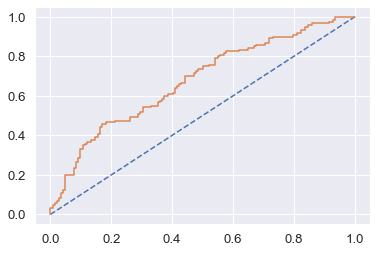

In [88]:
# Predict probabilities:
probs = model.predict_proba(X_test)

# Keep probabilities for the positive outcome only:
probs = probs[:, 1]

# Calculate AUC:
test_auc = roc_auc_score(Y_test, probs)
print('AUC: %.3f' % auc)

# Calculate roc curve:
test_fpr, test_tpr, test_thresholds = roc_curve(Y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

# Plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

### Confusion Matrix for the training data:

In [89]:
confusion_matrix(Y_train, Ytrain_predict)

array([[260,  69],
       [154, 127]], dtype=int64)

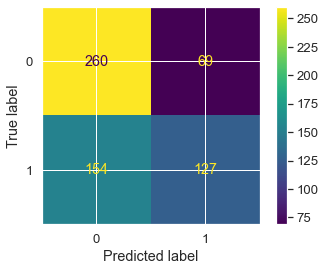

In [90]:
plot_confusion_matrix(model,X_train, Y_train);

In [91]:
print(classification_report(Y_train, Ytrain_predict))

              precision    recall  f1-score   support

           0       0.63      0.79      0.70       329
           1       0.65      0.45      0.53       281

    accuracy                           0.63       610
   macro avg       0.64      0.62      0.62       610
weighted avg       0.64      0.63      0.62       610



### Confusion Matrix for test data:

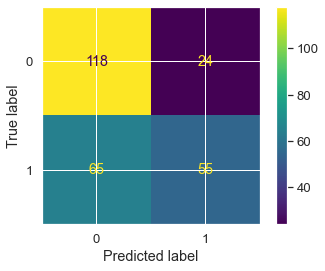

In [92]:
plot_confusion_matrix(model,X_test, Y_test);

In [93]:
print(classification_report(Y_test, Ytest_predict))

              precision    recall  f1-score   support

           0       0.64      0.83      0.73       142
           1       0.70      0.46      0.55       120

    accuracy                           0.66       262
   macro avg       0.67      0.64      0.64       262
weighted avg       0.67      0.66      0.65       262



### LDA:

In [135]:
#Build LDA Model
clf = LinearDiscriminantAnalysis()
model=clf.fit(X_train,Y_train)

### Prediction

In [136]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = model.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = model.predict(X_test)

### Training Data and Test Data Confusion Matrix Comparison

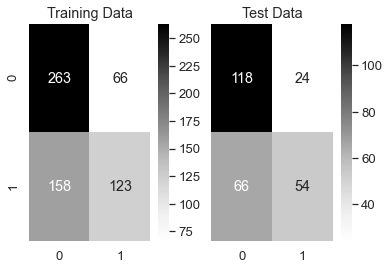

In [137]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(Y_train,pred_class_train)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(Y_test,pred_class_test)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');


### Training Data and Test Data Classification Report Comparison:

In [150]:
model.score(X_train, Y_train)

0.6327868852459017

In [146]:
print('Classification Report of the training data:\n\n',metrics.classification_report(Y_train,pred_class_train),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.62      0.80      0.70       329
           1       0.65      0.44      0.52       281

    accuracy                           0.63       610
   macro avg       0.64      0.62      0.61       610
weighted avg       0.64      0.63      0.62       610
 



In [148]:
confusion_matrix(Y_train, pred_class_train)

array([[263,  66],
       [158, 123]], dtype=int64)

In [151]:
model.score(X_test, Y_test)

0.6564885496183206

In [147]:
print('Classification Report of the test data:\n\n',metrics.classification_report(Y_test,pred_class_test),'\n')

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.64      0.83      0.72       142
           1       0.69      0.45      0.55       120

    accuracy                           0.66       262
   macro avg       0.67      0.64      0.63       262
weighted avg       0.66      0.66      0.64       262
 



In [152]:
confusion_matrix(Y_test, pred_class_test)

array([[118,  24],
       [ 66,  54]], dtype=int64)

### Probability prediction for the training and test data

In [139]:
# Training Data Probability Prediction
pred_prob_train = model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = model.predict_proba(X_test)

In [142]:
pred_prob_train[:,1]

array([0.73614833, 0.64936462, 0.45296681, 0.67842845, 0.66903745,
       0.3774365 , 0.32146187, 0.43700845, 0.3601507 , 0.62535644,
       0.23288822, 0.26149271, 0.44813877, 0.48143931, 0.29614015,
       0.46145671, 0.43653859, 0.30536315, 0.54175682, 0.66481517,
       0.49405489, 0.31531235, 0.75146336, 0.43228357, 0.31741838,
       0.74742033, 0.24732567, 0.7256214 , 0.49778025, 0.4701221 ,
       0.2458476 , 0.59535195, 0.39263888, 0.38905706, 0.34870239,
       0.34966751, 0.47524197, 0.50165433, 0.47132887, 0.20930823,
       0.22990207, 0.67104116, 0.40365647, 0.62197077, 0.64959972,
       0.34741408, 0.34082919, 0.73390632, 0.42023771, 0.62369484,
       0.57834131, 0.3978419 , 0.49066256, 0.40405466, 0.22000295,
       0.41866697, 0.25849518, 0.5276083 , 0.6674488 , 0.40702718,
       0.59934243, 0.26473066, 0.43421298, 0.34478906, 0.5114521 ,
       0.53275226, 0.41995444, 0.49835656, 0.40640466, 0.33834489,
       0.25698034, 0.65937394, 0.48721781, 0.25848244, 0.71797

AUC for the Training Data: 0.661


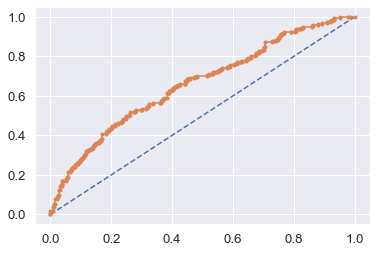

In [145]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(Y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')
plt.show()

AUC for the Test Data: 0.675


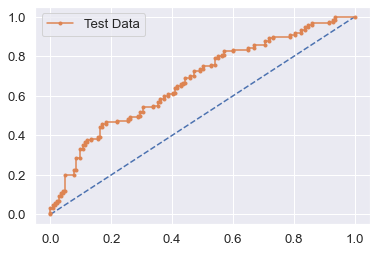

In [144]:
# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(Y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

### How to change the cut-off values for maximum accuracy?

We will do this exercise only on the training data.

0.1 

Accuracy Score 0.4607
F1 Score 0.6308 

Confusion Matrix


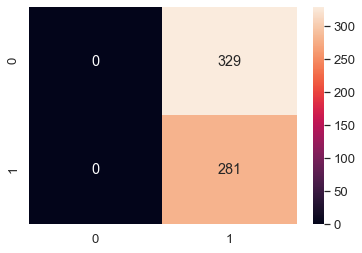

0.2 

Accuracy Score 0.4738
F1 Score 0.6365 

Confusion Matrix


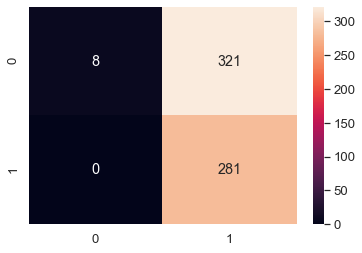

0.3 

Accuracy Score 0.5344
F1 Score 0.6485 

Confusion Matrix


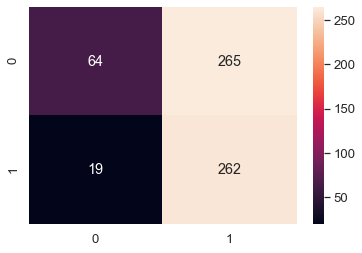

0.4 

Accuracy Score 0.5787
F1 Score 0.6088 

Confusion Matrix


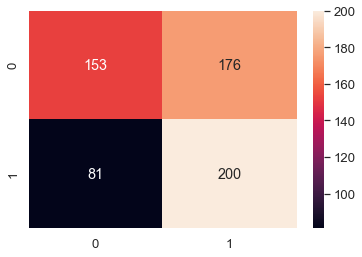

0.5 

Accuracy Score 0.6328
F1 Score 0.5234 

Confusion Matrix


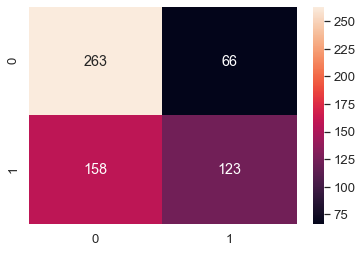

0.6 

Accuracy Score 0.6213
F1 Score 0.446 

Confusion Matrix


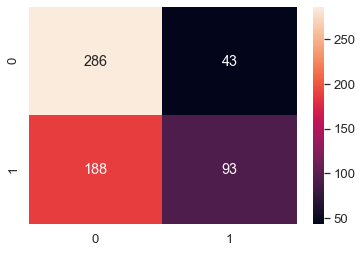

0.7 

Accuracy Score 0.5869
F1 Score 0.2455 

Confusion Matrix


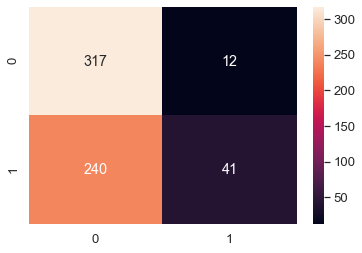

0.8 

Accuracy Score 0.541
F1 Score 0.0071 

Confusion Matrix


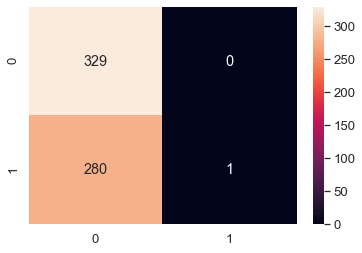

0.9 

Accuracy Score 0.5393
F1 Score 0.0 

Confusion Matrix


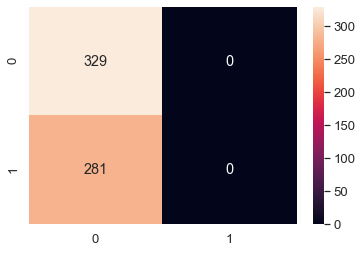

In [153]:
for j in np.arange(0.1,1,0.1):
    custom_prob = j #defining the cut-off value of our choice
    custom_cutoff_data=[]#defining an empty list
    for i in range(0,len(Y_train)):#defining a loop for the length of the test data
        if np.array(pred_prob_train[:,1])[i] > custom_prob:#issuing a condition for our probability values to be 
            #greater than the custom cutoff value
            a=1#if the probability values are greater than the custom cutoff then the value should be 1
        else:
            a=0#if the probability values are less than the custom cutoff then the value should be 0
        custom_cutoff_data.append(a)#adding either 1 or 0 based on the condition to the end of the list defined by us
    print(round(j,3),'\n')
    print('Accuracy Score',round(metrics.accuracy_score(Y_train,custom_cutoff_data),4))
    print('F1 Score',round(metrics.f1_score(Y_train,custom_cutoff_data),4),'\n')
    plt.figure(figsize=(6,4))
    print('Confusion Matrix')
    sns.heatmap(metrics.confusion_matrix(Y_train,custom_cutoff_data),annot=True,fmt='.4g'),'\n\n'
    plt.show();

In [158]:
#Predicting the classes on the test data

data_pred_custom_cutoff=[]
for i in range(0,len(pred_prob_test[:,1])):
    if np.array(pred_prob_test[:,1])[i]>0.3:
        a=1
    else:
        a=0
    data_pred_custom_cutoff.append(a)

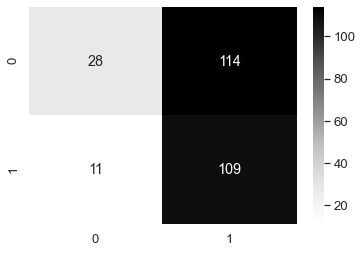

In [160]:
sns.heatmap((metrics.confusion_matrix(Y_test,data_pred_custom_cutoff)),annot=True,fmt='.5g',cmap='Greys');

In [161]:
print('Classification Report of the default cut-off test data:\n\n',metrics.classification_report(Y_test,pred_class_test),'\n\n\n')
print('Classification Report of the custom cut-off test data:\n\n',metrics.classification_report(Y_test,data_pred_custom_cutoff),'\n')

Classification Report of the default cut-off test data:

               precision    recall  f1-score   support

           0       0.64      0.83      0.72       142
           1       0.69      0.45      0.55       120

    accuracy                           0.66       262
   macro avg       0.67      0.64      0.63       262
weighted avg       0.66      0.66      0.64       262
 



Classification Report of the custom cut-off test data:

               precision    recall  f1-score   support

           0       0.72      0.20      0.31       142
           1       0.49      0.91      0.64       120

    accuracy                           0.52       262
   macro avg       0.60      0.55      0.47       262
weighted avg       0.61      0.52      0.46       262
 



# END